In [1]:
from __future__ import print_function, division
%matplotlib inline

# Your code goes here
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, recall_score, precision_score, f1_score, confusion_matrix

/usr/lib64/python3.4/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset = pd.read_csv('test_createEvent.csv',delimiter = ',')
# dataset1 = pd.read_csv('test_createEvent_12_18.csv',delimiter = ',') # this one does not take care the CRAN before GH date

In [3]:
X = (dataset.drop('class', axis=1)).drop('id', axis=1)
y = dataset['class']
dataset.shape

(29286, 23)

In [4]:
dataset.describe()

,activity_intensity,class,final_teamsize,first_quater_teamsize,normalized_proj_span,num_CommitComment,num_Create,num_Delete,num_Download,num_Fork,...,num_Issues,num_Member,num_Public,num_PullRequest,num_PullRequestReviewComment,num_Push,num_Release,num_TeamAdd,num_Watch,proj_span
count,29286.000000,29286.000000,29286.000000,29286.00000,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000,...,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000
mean,2.032372,0.236700,2.747388,2.42662,0.031819,0.039780,1.483303,0.062999,0.004951,1.577272,...,0.392235,0.035478,0.002390,0.645360,0.158096,5.451513,0.019566,0.001776,0.358567,58.686266
std,3.694424,0.425064,231.985625,231.98847,0.106023,1.032388,1.844393,0.781438,0.341650,224.935669,...,9.736311,0.308888,0.091621,30.034193,15.336000,23.635669,0.347865,0.048154,6.030359,193.306612
min,0.001577,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.857143,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,2.500000,0.000000,1.000000,1.00000,0.004384,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,8.000000
max,403.000000,1.000000,39666.000000,39666.00000,1.237260,122.000000,98.000000,55.000000,45.000000,38489.000000,...,1450.000000,30.000000,13.000000,4353.000000,2556.000000,1894.000000,29.000000,2.000000,593.000000,2258.000000


In [5]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.3, random_state=20190101)

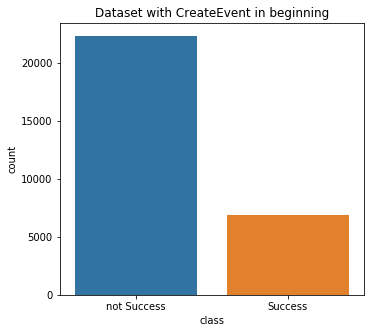

In [6]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ax1 = sns.countplot(x='class', data=dataset)
ax1.set_xticklabels(['not Success', 'Success'])
plt.title('Dataset with CreateEvent in beginning')
# ax2 = plt.subplot(1,2,2)
# sns.countplot(x='class', data=dataset1)
# ax2.set_xticklabels(['not Success', 'Success'])
# plt.title('Dataset don\'t care CRAN before GH')
plt.show()

In [7]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
ca = lr.score(X_tr, y_tr)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))
ca = lr.score(X_test, y_test)
y_pred = lr.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on test set: {:.5f}'.format(ca))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))
confusion_matrix(y_pred=y_pred, y_true=y_test)

Classification accuracy of the LogisticRegression classifier on training set: 0.82244
Precision on train: 0.81545
Recall on train: 0.30225

Classification accuracy of the LogisticRegression classifier on test set: 0.81106
Precision on test: 0.82767
Recall on test: 0.30170


array([[6468,  137],
       [1523,  658]])

In [8]:
# display coef for logistic regression model
print(lr.coef_)
print(lr.intercept_)

[[-1.15512037e-01 -1.17665156e-01 -1.44654255e-01 -7.24092236e-05
  -9.71139453e-02  9.31815565e-01 -3.10483147e-01 -1.07749966e-02
  -8.70081088e-02  1.34255896e-02  4.00843557e-02  2.88741885e-02
  -9.84206202e-02 -1.45854552e-02  7.26845035e-02 -8.68868036e-02
  -6.25158090e-02 -2.53953978e-02 -1.63591780e-02  3.27596617e-01
   5.10285195e-04]]
[-2.08022227]


In [9]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

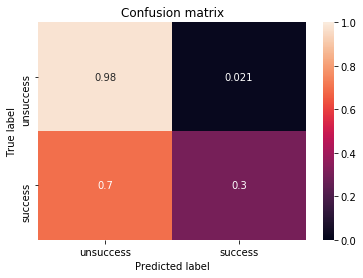

In [10]:
cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# retrive the normalized version of cm
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
plt.show()

In [11]:
# transform the data
ss = StandardScaler()
ss.fit(X_tr)
X_tr = ss.transform(X_tr)
X_test = ss.transform(X_test)

In [12]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
ca = lr.score(X_tr, y_tr)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

ca = lr.score(X_test, y_test)
y_pred = lr.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on test set: {:.5f}'.format(ca))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Classification accuracy of the LogisticRegression classifier on training set: 0.82273
Precision on train: 0.80704
Recall on train: 0.30899

Classification accuracy of the LogisticRegression classifier on test set: 0.81095
Precision on test: 0.82178
Recall on test: 0.30445


In [13]:
# display coef for logistic regression model
print(lr.coef_)
print(lr.intercept_)

[[-0.58659562  1.11425872 -3.61870914 -0.93228188 -0.13323661  2.30880896
  -0.99538084 -0.34503709 -0.05395326  0.02218607  0.95017776 -0.02795179
  -0.09995622 -0.09053906  0.74198529 -0.70472628 -1.06658704 -0.28288239
  -0.12661374  1.64542931  1.00113556]]
[-1.43618843]


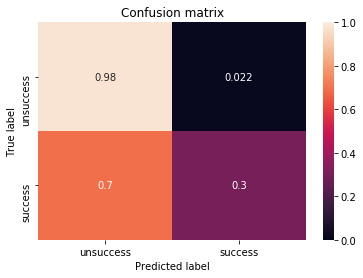

In [14]:
cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# retrive the normalized version of cm
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
plt.show()

In [15]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_tr, y_tr)
y_pred = rf.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
accuracy_score_train = rf.score(X_tr, y_tr)
print('Accuracy score on the training dataset: {}'.format(accuracy_score_train))
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

# test set
y_pred = rf.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
accuracy_score_test = rf.score(X_test, y_test)
print('\nAccuracy score on the test dataset: {:.5f}'.format(accuracy_score_test))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Accuracy score on the training dataset: 0.9032682926829269
Precision on train: 0.94387
Recall on train: 0.61945

Accuracy score on the test dataset: 0.85978
Precision on test: 0.87099
Recall on test: 0.51077


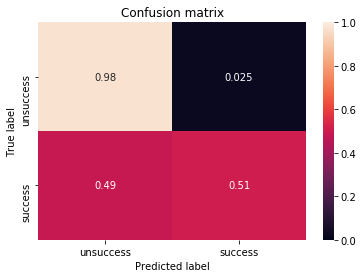

In [16]:
cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# retrive the normalized version of cm
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
plt.show()

In [17]:
features = X.columns[:].values.tolist()
important_features = rf.feature_importances_
feature_index = np.argsort(important_features)[::-1]
print('Names of the 10 most important features:')
for n in range(10):
    print("{}. {}".format(n+1, features[feature_index[n]]))

Names of the 10 most important features:
1. num_Create
2. num_Push
3. activity_intensity
4. normalized_proj_span
5. proj_span
6. final_teamsize
7. first_quater_teamsize
8. num_Delete
9. num_Watch
10. num_PullRequest


In [18]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_tr, y_tr)
ca = svc_linear.score(X_tr, y_tr)
print('Linear SVC classification accuracy on training set: {:.5f}'.format(ca))
ca = svc_linear.score(X_test, y_test)
print('Linear SVC classification accuracy on test set: {:.5f}'.format(ca))

Linear SVC classification accuracy on training set: 0.85932
Linear SVC classification accuracy on test set: 0.85033


In [19]:


svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_tr, y_tr)
ca = svc_rbf.score(X_tr, y_tr)
print('\nRadial Basis Function SVC classification accuracy on training set: {:.5f}'.format(ca))
ca = svc_rbf.score(X_test, y_test)
print('Radial Basis Function SVC classification accuracy on test set: {:.5f}'.format(ca))




Radial Basis Function SVC classification accuracy on training set: 0.86546
Radial Basis Function SVC classification accuracy on test set: 0.85386


In [20]:
y_pred = svc_rbf.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

y_pred = svc_rbf.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))


Precision on train: 0.82964
Recall on train: 0.52789
Precision on test: 0.83051
Recall on test: 0.51674


In [21]:
svc_poly = SVC(kernel='poly')
svc_poly.fit(X_tr, y_tr)
ca = svc_poly.score(X_tr, y_tr)
print('\nPolynomial SVC classification accuracy on training set: {:.5f}'.format(ca))
ca = svc_poly.score(X_test, y_test)
print('Polynomial SVC classification accuracy on test set: {:.5f}'.format(ca))


Polynomial SVC classification accuracy on training set: 0.77332
Polynomial SVC classification accuracy on test set: 0.74937
